# Reglas de asociación

## 1. Codificación


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('processed/processed_data.xlsx')
df

,TIPO SEGURO,SEXO,EDAD,CAUSA A (CIE-X),ubigeo_inei,macroregion_inei,MES,CAUSA,TEMP,HR,...,Lugar_de_consulta,Tiempo_total_espera_minutos,Motivo_no_atencion,Tiempo_espera_final_minutos,departamento_provincia,Calidad_vivienda,Calidad_servicio_agua,departamento,provincia,distrito
0,ESSALUD,FEMENINO,88,J960,150128,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,RIMAC
1,SIS,FEMENINO,75,J960,40413,SUR,5,INSUFICIENCIA RESPIRATORIA AGUDA,4.963183,45.591855,...,No buscó atención,0,Sin razón específica,0,404,Baja,Alta,AREQUIPA,CASTILLA,URACA
2,ESSALUD,FEMENINO,48,J960,40201,SUR,10,INSUFICIENCIA RESPIRATORIA AGUDA,5.674916,33.935498,...,Farmacia o botica,0,Sin razón específica,0,402,Alta,Baja,AREQUIPA,CAMANA,CAMANA
3,ESSALUD,FEMENINO,68,J960,40129,SUR,10,INSUFICIENCIA RESPIRATORIA AGUDA,5.674916,33.935498,...,No buscó atención,0,Sin razón específica,0,401,Media,Media,AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO
4,ESSALUD,MASCULINO,90,J960,150140,LIMA METROPOLITANA,11,INSUFICIENCIA RESPIRATORIA AGUDA,12.387783,50.291238,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,SANTIAGO DE SURCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,ESSALUD,MASCULINO,17,J960,150137,LIMA METROPOLITANA,9,INSUFICIENCIA RESPIRATORIA AGUDA,12.000746,41.718070,...,No buscó atención,0,Sin razón específica,0,1501,Alta,Alta,LIMA,LIMA,SANTA ANITA
6656,ESSALUD,FEMENINO,87,J969,150141,LIMA METROPOLITANA,9,INSUFICIENCIA RESPIRATORIA,12.000746,41.718070,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,SURQUILLO
6657,SIS,MASCULINO,27,J960,150128,LIMA METROPOLITANA,9,INSUFICIENCIA RESPIRATORIA AGUDA,12.000746,41.718070,...,No buscó atención,0,Sin razón específica,0,1501,Alta,Alta,LIMA,LIMA,RIMAC
6658,ESSALUD,MASCULINO,89,J960,150108,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,CHORRILLOS


In [3]:
df['macroregion_inei'].value_counts()

macroregion_inei
LIMA METROPOLITANA    5141
SUR                   1118
CENTRO                 401
Name: count, dtype: int64

In [4]:
#Eliminar columnas inecesarias
df.drop(['ubigeo_inei','DOMINIO_x','ESTRATO_x','departamento_provincia','CAUSA A (CIE-X)','Tiempo_espera_final_minutos','Tiempo_total_espera_minutos','departamento', 'provincia', 'distrito','HR','PP','Lugar_de_consulta'],axis=1,inplace = True)

In [5]:
#corregir Types
numeric = ['EDAD','TEMP']
for col in df.columns:
    if col not in numeric:
        df[col] = df[col].astype('category')
df.dtypes

TIPO SEGURO                                                                             category
SEXO                                                                                    category
EDAD                                                                                       int64
macroregion_inei                                                                        category
MES                                                                                     category
CAUSA                                                                                   category
TEMP                                                                                     float64
Estacion                                                                                category
¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?               category
¿Ha tomado medicamentos por prevención o como parte de un tratamiento para el covid-    category
Motivo_no_atencion            

In [6]:
# Definir umbral de cardinalidad
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
threshold = 15

high_cardinality_cols = [col for col in categorical_columns if df[col].nunique() > threshold]
low_cardinality_cols = [col for col in categorical_columns if df[col].nunique() <= threshold]

print(f"Columnas con Alta Cardinalidad (>{threshold} categorías): {high_cardinality_cols}")
print(f"\nColumnas con Baja Cardinalidad (≤{threshold} categorías): {low_cardinality_cols}")


Columnas con Alta Cardinalidad (>15 categorías): []

Columnas con Baja Cardinalidad (≤15 categorías): ['TIPO SEGURO', 'SEXO', 'macroregion_inei', 'MES', 'CAUSA', 'Estacion', '¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?', '¿Ha tomado medicamentos por prevención o como parte de un tratamiento para el covid-', 'Motivo_no_atencion', 'Calidad_vivienda', 'Calidad_servicio_agua']


In [7]:
# Codificación de variables de baja cardinalidad
df = pd.get_dummies(df, columns=low_cardinality_cols)
df.shape

(6660, 53)

In [8]:
# Lista de columnas numéricas
numeric = ['EDAD', 'TEMP']

# Procesar la columna EDAD
df['EDAD_GROUP'] = pd.cut(df['EDAD'], bins=range(df['EDAD'].min(), df['EDAD'].max() + 10, 10), right=False)

# Procesar las demás columnas numéricas utilizando los percentiles 33 y 66
for col in ['TEMP']:
    bins = [-float('inf'), df[col].quantile(0.33), df[col].quantile(0.66), float('inf')]
    labels = ['Bajo', 'Medio', 'Alto']
    # Crear una nueva columna con sufijo _GROUP
    df[f'{col}_GROUP'] = pd.cut(df[col], bins=bins, labels=labels, right=False)

# Generar columnas One-Hot
categorical_cols = ['EDAD_GROUP'] + [f'{col}_GROUP' for col in ['TEMP']]
df_onehot = pd.get_dummies(df[categorical_cols])

# Concatenar las columnas codificadas
df = pd.concat([df, df_onehot], axis=1)

# Eliminar columnas originales y categorizadas (si no se necesitan)
df.drop(numeric + categorical_cols, axis=1, inplace=True)

# Resultado final
df


,TIPO SEGURO_ESSALUD,TIPO SEGURO_IGNORADO,TIPO SEGURO_OTROS,TIPO SEGURO_PRIVADOS,TIPO SEGURO_SANIDAD EP,TIPO SEGURO_SANIDAD FAP,TIPO SEGURO_SANIDAD NAVAL,TIPO SEGURO_SANIDAD PNP,TIPO SEGURO_SIS,TIPO SEGURO_USUARIO,...,"EDAD_GROUP_[40, 50)","EDAD_GROUP_[50, 60)","EDAD_GROUP_[60, 70)","EDAD_GROUP_[70, 80)","EDAD_GROUP_[80, 90)","EDAD_GROUP_[90, 100)","EDAD_GROUP_[100, 110)",TEMP_GROUP_Bajo,TEMP_GROUP_Medio,TEMP_GROUP_Alto
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6656,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
6657,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
6658,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [9]:
df.describe()

,TIPO SEGURO_ESSALUD,TIPO SEGURO_IGNORADO,TIPO SEGURO_OTROS,TIPO SEGURO_PRIVADOS,TIPO SEGURO_SANIDAD EP,TIPO SEGURO_SANIDAD FAP,TIPO SEGURO_SANIDAD NAVAL,TIPO SEGURO_SANIDAD PNP,TIPO SEGURO_SIS,TIPO SEGURO_USUARIO,...,"EDAD_GROUP_[40, 50)","EDAD_GROUP_[50, 60)","EDAD_GROUP_[60, 70)","EDAD_GROUP_[70, 80)","EDAD_GROUP_[80, 90)","EDAD_GROUP_[90, 100)","EDAD_GROUP_[100, 110)",TEMP_GROUP_Bajo,TEMP_GROUP_Medio,TEMP_GROUP_Alto
count,6660,6660,6660,6660,6660,6660,6660,6660,6660,6660,...,6660,6660,6660,6660,6660,6660,6660,6660,6660,6660
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,3464,6373,6610,6516,6624,6640,6635,6502,4220,6624,...,6384,6155,5748,5175,4650,5619,6574,4474,4622,4224


## 2. Selección de atributos

In [10]:
from sklearn.metrics import pairwise_distances
import numpy as np


# Reportar número de columnas originales y resultantes
original_columns = df.shape[1]
print(f'Número de columnas originales: {original_columns}')


# Calcular la matriz de correlación Jaccard
corr_matrix = 1 - pairwise_distances(df.T.to_numpy(), metric="jaccard")
np.fill_diagonal(corr_matrix, 0)

# Identificar columnas redundantes
threshold = 0.90  # 90% de similitud
to_drop = set()
for i, col in enumerate(df.columns):
    if col not in to_drop:
        redundant = np.where(corr_matrix[i] > threshold)[0]
        to_drop.update(df.columns[redundant])

# Filtrar atributos redundantes
df_reduced = df.drop(columns=list(to_drop))

# Reportar el número de columnas después de eliminar las redundantes
print(f'Número de columnas resultantes después de eliminar redundantes: {df_reduced.shape[1]}')


Número de columnas originales: 65
Número de columnas resultantes después de eliminar redundantes: 62


Número de columnas originales: 62
Número de columnas resultantes después de eliminar columnas irrelevantes: 18


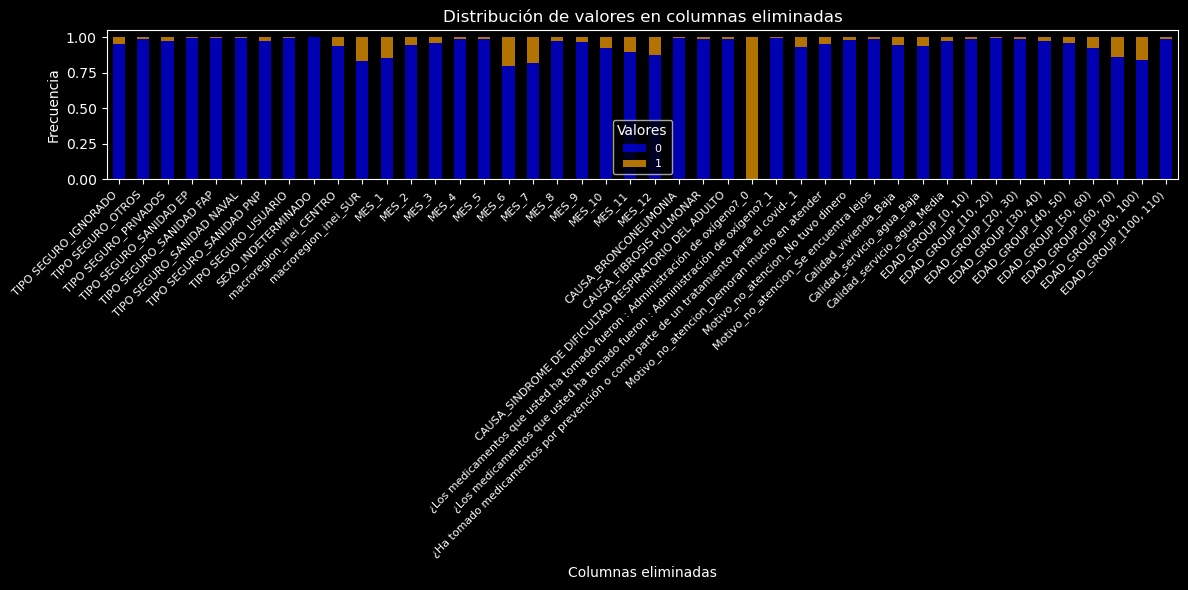

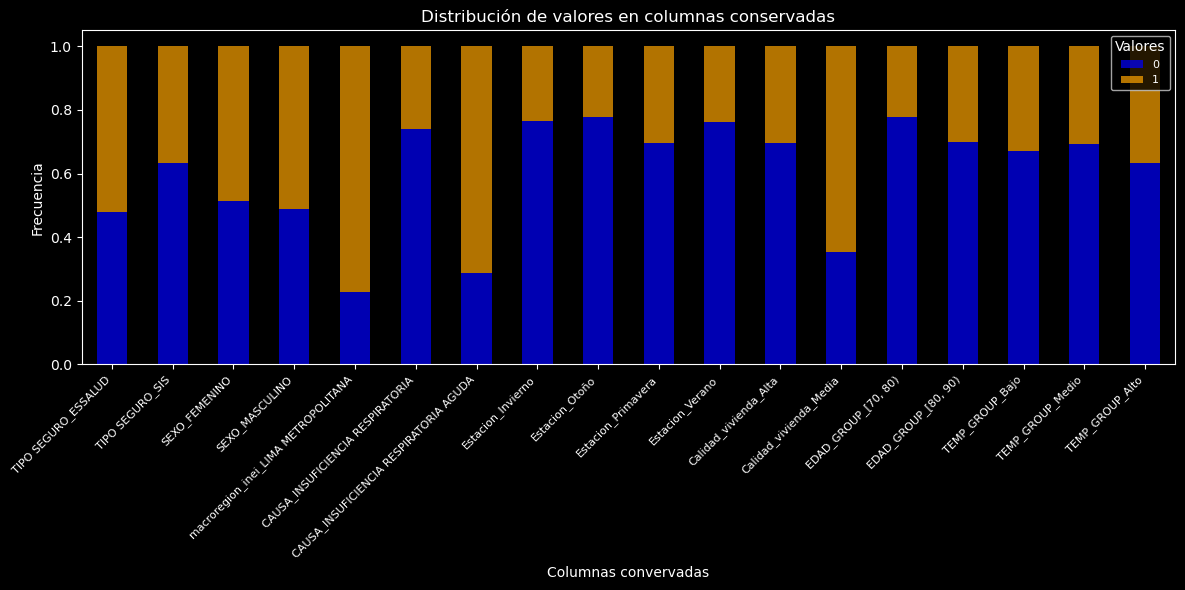

In [11]:
# Identificar columnas con valores desbalanceados. Se eliminan columnas donde el valor predominante es 0 y este representa el 80% o más de las filas.
print(f"Número de columnas originales: {df_reduced.shape[1]}")
threshold = 0.2
# Identificar columnas a eliminar (donde el valor predominante es >= 1 - threshold)
removed_columns = df_reduced.loc[:, (df_reduced.sum(axis=0) / len(df_reduced) <= threshold) | 
                            (df_reduced.sum(axis=0) / len(df_reduced) >= 1 - threshold)].columns

# Crear DataFrame con datos de columnas eliminadas
removed_data = df_reduced[removed_columns].apply(lambda col: col.value_counts(normalize=True)).fillna(0).T

# Filtrar columnas relevantes
df_reduced = df_reduced.drop(removed_columns,axis=1)

print(f"Número de columnas resultantes después de eliminar columnas irrelevantes: {df_reduced.shape[1]}")

#Graficar
removed_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=['blue', 'orange'], 
    alpha=0.7
)
plt.title("Distribución de valores en columnas eliminadas", fontsize=12)
plt.xlabel("Columnas eliminadas", fontsize=10)
plt.ylabel("Frecuencia", fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.legend(["0", "1"], title="Valores", fontsize=8)
plt.tight_layout()
plt.show()

df_reduced.apply(lambda col: col.value_counts(normalize=True)).fillna(0).T.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=['blue', 'orange'], 
    alpha=0.7
)
plt.title("Distribución de valores en columnas conservadas", fontsize=12)
plt.xlabel("Columnas convervadas", fontsize=10)
plt.ylabel("Frecuencia", fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.legend(["0", "1"], title="Valores", fontsize=8)
plt.tight_layout()
plt.show()
#


## 3. Reglas de asociación.

In [12]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_transactions(df):
    """
    Prepara los datos binarios (one-hot encoded) para el algoritmo apriori
    """
    transactions = []
    for _, row in df.iterrows():
        # Obtiene las columnas donde el valor es 1
        transaction = row.index[row == 1].tolist()
        transactions.append(transaction)
    return transactions

def generate_targeted_rules(df, target_antecedents, min_support=0.1, min_confidence=0.2, min_lift=3, max_length=3):
    """
    Genera reglas de asociación con antecedentes específicos
    """
    transactions = prepare_transactions(df)
    rules = apriori(transactions,
                    min_support=min_support,
                    min_confidence=min_confidence,
                    min_lift=min_lift,
                    max_length=max_length)
    
    rules_list = list(rules)
    filtered_rules = []
    
    for rule in rules_list:
        antecedents = set(rule[2][0][0])
        if any(ant in antecedents for ant in target_antecedents):
            filtered_rules.append(rule)
    
    return filtered_rules

def inspect_rules(rules):
    """
    Convierte las reglas de asociación en un DataFrame para mejor análisis
    """
    antecedents = []
    consequents = []
    supports = []
    confidences = []
    lifts = []
    
    for rule in rules:
        ant = list(rule[2][0][0])
        con = list(rule[2][0][1])
        
        support = rule[1]
        confidence = rule[2][0][2]
        lift = rule[2][0][3]
        
        antecedents.append(frozenset(ant))  # Usar frozenset para mantener los conjuntos
        consequents.append(frozenset(con))
        supports.append(support)
        confidences.append(confidence)
        lifts.append(lift)
    
    rules_df = pd.DataFrame({
        'Antecedentes': antecedents,
        'Consecuentes': consequents,
        'Soporte': np.round(supports,2),
        'Confianza': np.round(confidences,2),
        'Lift': np.round(lifts,2)
    })
    
    return rules_df.sort_values('Lift', ascending=False)

def analyze_targeted_rules(rules_df, target_antecedents):
    """
    Analiza las reglas generadas con foco en los antecedentes objetivo
    """
    print("=== Análisis de Reglas de Asociación con Antecedentes Específicos ===")
    print(f"\nAntecedentes objetivo: {', '.join(target_antecedents)}")
    print(f"Número total de reglas encontradas: {len(rules_df)}")
    
    # Análisis por antecedente objetivo
    for target in target_antecedents:
        # Filtrar usando sets en lugar de strings
        rules_with_target = rules_df[rules_df['Antecedentes'].apply(lambda x: target in x)]
        print(f"\nReglas con antecedente '{target}':")
        print(f"Cantidad de reglas: {len(rules_with_target)}")
        
        if len(rules_with_target) > 0:
            print("\nEstadísticas de las métricas para estas reglas:")
            for metric in ['Soporte', 'Confianza', 'Lift']:
                print(f"\n{metric}:")
                print(f"Mínimo: {rules_with_target[metric].min():.4f}")
                print(f"Máximo: {rules_with_target[metric].max():.4f}")
                print(f"Promedio: {rules_with_target[metric].mean():.4f}")
            
            # Mostrar algunas reglas ejemplo
            print("\nEjemplos de reglas encontradas:")
            for _, rule in rules_with_target.head(3).iterrows():
                print(f"Antecedentes: {' & '.join(rule['Antecedentes'])}")
                print(f"Consecuentes: {' & '.join(rule['Consecuentes'])}")
                print(f"Lift: {rule['Lift']:.4f}\n")

def visualize_targeted_rules(rules_df, target_antecedents):
    """
    Visualiza las reglas filtradas por antecedentes específicos
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    metrics = ['Soporte', 'Confianza', 'Lift']
    
    for i, metric in enumerate(metrics):
        data = []
        labels = []
        
        for target in target_antecedents:
            rules_with_target = rules_df[rules_df['Antecedentes'].apply(lambda x: target in x)]
            if len(rules_with_target) > 0:
                data.append(rules_with_target[metric].values)
                labels.append(target.split('_')[-1])  # Simplificar etiquetas
        
        if data:
            axes[i].boxplot(data, labels=labels)
            axes[i].set_title(f'Distribución de {metric}')
            axes[i].set_xticklabels(labels, rotation=45, ha='right')
    
    plt.tight_layout()
    return fig

def main_targeted(df, target_antecedents, min_support=0.1, min_confidence=0.2, min_lift=3, max_length=3):
    """
    Función principal para generar y analizar reglas con antecedentes específicos
    """
    # Generar reglas
    rules = generate_targeted_rules(df, 
                                  target_antecedents,
                                  min_support=min_support,
                                  min_confidence=min_confidence,
                                  min_lift=min_lift,
                                  max_length=max_length)
    
    if not rules:
        print("No se encontraron reglas con los criterios especificados. Intenta reducir los valores mínimos de soporte, confianza o lift.")
        return None
    
    # Convertir a DataFrame y analizar
    rules_df = inspect_rules(rules)
    
    # Analizar reglas
    analyze_targeted_rules(rules_df, target_antecedents)
    
    # Visualizar reglas
    fig = visualize_targeted_rules(rules_df, target_antecedents)
    plt.show()
    
    # Función para limpiar frozensets
    def clean_frozenset(value):
        if isinstance(value, frozenset):
            # Convierte el frozenset a string y limpia los caracteres extra
            return str(value).replace("frozenset({'", "").replace("'})", "")
        return value

    # Aplicar la limpieza a las columnas Antecedentes y Consecuentes
    rules_df['Antecedentes'] = rules_df['Antecedentes'].apply(clean_frozenset)
    rules_df['Consecuentes'] = rules_df['Consecuentes'].apply(clean_frozenset)

    # Guardar el DataFrame limpio
    rules_df.to_excel(f'rules_{target_antecedents[0]}.xlsx')
    return rules_df



=== Análisis de Reglas de Asociación con Antecedentes Específicos ===

Antecedentes objetivo: CAUSA_BRONCONEUMONIA, CAUSA_FIBROSIS PULMONAR, CAUSA_INSUFICIENCIA RESPIRATORIA, CAUSA_INSUFICIENCIA RESPIRATORIA AGUDA, CAUSA_SINDROME DE DIFICULTAD RESPIRATORIO DEL ADULTO
Número total de reglas encontradas: 5

Reglas con antecedente 'CAUSA_BRONCONEUMONIA':
Cantidad de reglas: 0

Reglas con antecedente 'CAUSA_FIBROSIS PULMONAR':
Cantidad de reglas: 0

Reglas con antecedente 'CAUSA_INSUFICIENCIA RESPIRATORIA':
Cantidad de reglas: 5

Estadísticas de las métricas para estas reglas:

Soporte:
Mínimo: 0.0700
Máximo: 0.0900
Promedio: 0.0800

Confianza:
Mínimo: 0.2500
Máximo: 0.3600
Promedio: 0.3120

Lift:
Mínimo: 1.0200
Máximo: 1.2000
Promedio: 1.0840

Ejemplos de reglas encontradas:
Antecedentes: CAUSA_INSUFICIENCIA RESPIRATORIA
Consecuentes: Estacion_Primavera
Lift: 1.2000

Antecedentes: CAUSA_INSUFICIENCIA RESPIRATORIA
Consecuentes: EDAD_GROUP_[70, 80)
Lift: 1.1200

Antecedentes: CAUSA_INSUFICI

C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)


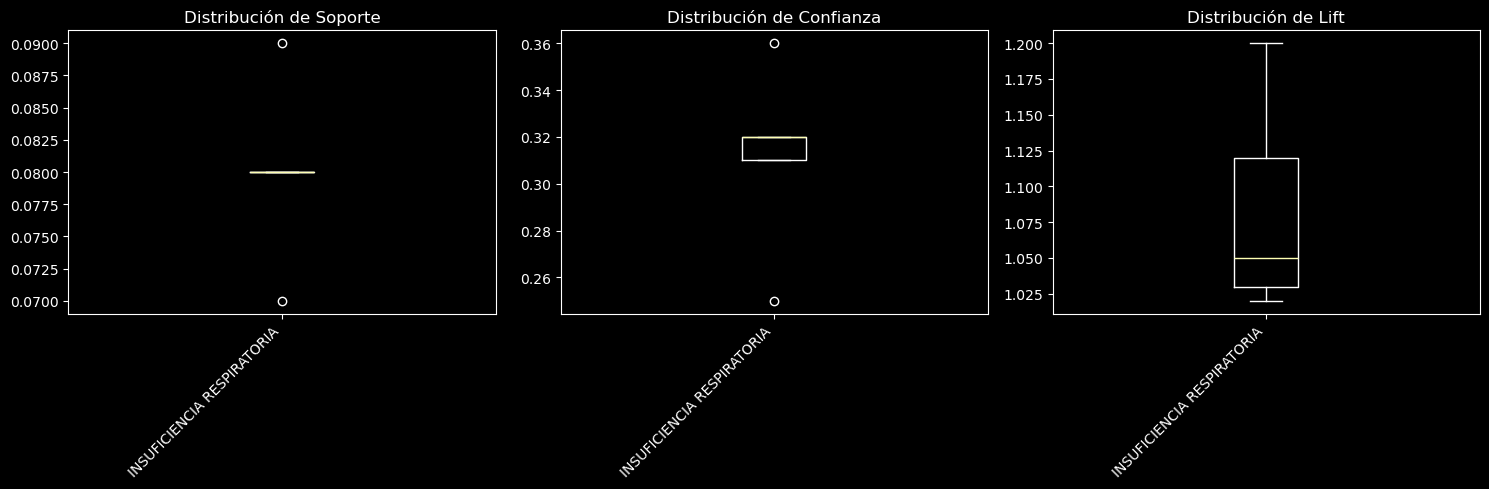

,Antecedentes,Consecuentes,Soporte,Confianza,Lift
3,CAUSA_INSUFICIENCIA RESPIRATORIA,Estacion_Primavera,0.09,0.36,1.20
1,CAUSA_INSUFICIENCIA RESPIRATORIA,"EDAD_GROUP_[70, 80)",0.07,0.25,1.12
0,CAUSA_INSUFICIENCIA RESPIRATORIA,Calidad_vivienda_Alta,0.08,0.32,1.05
4,CAUSA_INSUFICIENCIA RESPIRATORIA,TEMP_GROUP_Medio,0.08,0.32,1.03
2,CAUSA_INSUFICIENCIA RESPIRATORIA,"EDAD_GROUP_[80, 90)",0.08,0.31,1.02


In [13]:
# Antecedentes: Enfermedades
target_antecedents = [
    'CAUSA_BRONCONEUMONIA', 
    'CAUSA_FIBROSIS PULMONAR',
    'CAUSA_INSUFICIENCIA RESPIRATORIA',
    'CAUSA_INSUFICIENCIA RESPIRATORIA AGUDA',
    'CAUSA_SINDROME DE DIFICULTAD RESPIRATORIO DEL ADULTO'
]

# Generar y analizar las reglas
rules_df = main_targeted(
    df_reduced,
    target_antecedents,
    min_support=0.05,
    min_confidence=0.1,
    min_lift=1,
    max_length=2
)
rules_df

=== Análisis de Reglas de Asociación con Antecedentes Específicos ===

Antecedentes objetivo: Calidad_vivienda_Alta, Calidad_vivienda_Media, Calidad_vivienda_Baja
Número total de reglas encontradas: 7

Reglas con antecedente 'Calidad_vivienda_Alta':
Cantidad de reglas: 5

Estadísticas de las métricas para estas reglas:

Soporte:
Mínimo: 0.0500
Máximo: 0.1000
Promedio: 0.0840

Confianza:
Mínimo: 0.1700
Máximo: 0.3300
Promedio: 0.2760

Lift:
Mínimo: 1.0300
Máximo: 1.0800
Promedio: 1.0560

Ejemplos de reglas encontradas:
Antecedentes: Calidad_vivienda_Alta
Consecuentes: EDAD_GROUP_[90, 100)
Lift: 1.0800

Antecedentes: Calidad_vivienda_Alta
Consecuentes: Estacion_Primavera
Lift: 1.0700

Antecedentes: Calidad_vivienda_Alta
Consecuentes: Estacion_Invierno
Lift: 1.0600


Reglas con antecedente 'Calidad_vivienda_Media':
Cantidad de reglas: 2

Estadísticas de las métricas para estas reglas:

Soporte:
Mínimo: 0.0900
Máximo: 0.1000
Promedio: 0.0950

Confianza:
Mínimo: 0.1400
Máximo: 0.1500
Promed

C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)


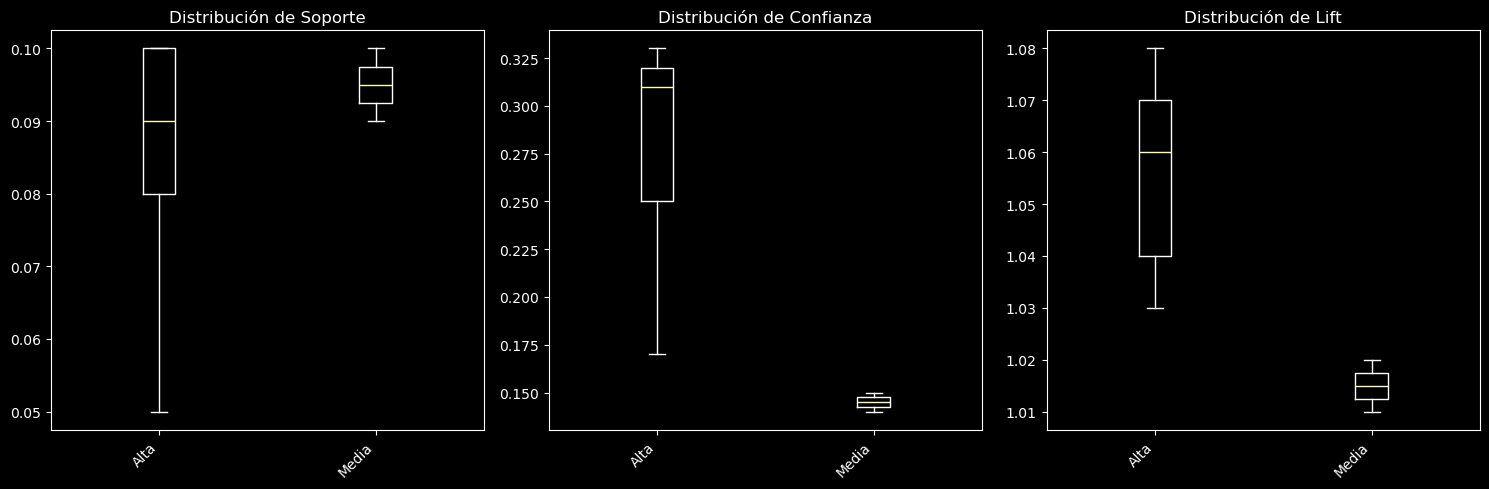

,Antecedentes,Consecuentes,Soporte,Confianza,Lift
1,Calidad_vivienda_Alta,"EDAD_GROUP_[90, 100)",0.05,0.17,1.08
3,Calidad_vivienda_Alta,Estacion_Primavera,0.10,0.33,1.07
2,Calidad_vivienda_Alta,Estacion_Invierno,0.08,0.25,1.06
4,Calidad_vivienda_Alta,TEMP_GROUP_Medio,0.10,0.32,1.04
0,Calidad_vivienda_Alta,"EDAD_GROUP_[80, 90)",0.09,0.31,1.03
6,Calidad_vivienda_Media,MES_1,0.10,0.15,1.02
5,Calidad_vivienda_Media,"EDAD_GROUP_[60, 70)",0.09,0.14,1.01


In [14]:
# Antecedentes: Calidad de vivienda
target_antecedents = [
'Calidad_vivienda_Alta', 'Calidad_vivienda_Media','Calidad_vivienda_Baja'
]

# Generar y analizar las reglas
rules_df = main_targeted(
    df,
    target_antecedents,
    min_support=0.05,
    min_confidence=0.1,
    min_lift=1,
    max_length=2
)
rules_df.to_excel(f'rules_{target_antecedents[0]}.xlsx')
rules_df

=== Análisis de Reglas de Asociación con Antecedentes Específicos ===

Antecedentes objetivo: Calidad_servicio_agua_Alta, Calidad_servicio_agua_Baja, Calidad_servicio_agua_Media
Número total de reglas encontradas: 60

Reglas con antecedente 'Calidad_servicio_agua_Alta':
Cantidad de reglas: 59

Estadísticas de las métricas para estas reglas:

Soporte:
Mínimo: 0.0500
Máximo: 0.8700
Promedio: 0.2995

Confianza:
Mínimo: 0.9100
Máximo: 1.0000
Promedio: 0.9612

Lift:
Mínimo: 1.0000
Máximo: 3.2900
Promedio: 1.1627

Ejemplos de reglas encontradas:
Antecedentes: MES_11 & Calidad_servicio_agua_Alta
Consecuentes: Estacion_Primavera
Lift: 3.2900

Antecedentes: Calidad_servicio_agua_Alta & MES_10
Consecuentes: Estacion_Primavera
Lift: 3.2900

Antecedentes: macroregion_inei_SUR & Calidad_servicio_agua_Alta
Consecuentes: TEMP_GROUP_Bajo
Lift: 3.0500


Reglas con antecedente 'Calidad_servicio_agua_Baja':
Cantidad de reglas: 1

Estadísticas de las métricas para estas reglas:

Soporte:
Mínimo: 0.0600
Má

C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)


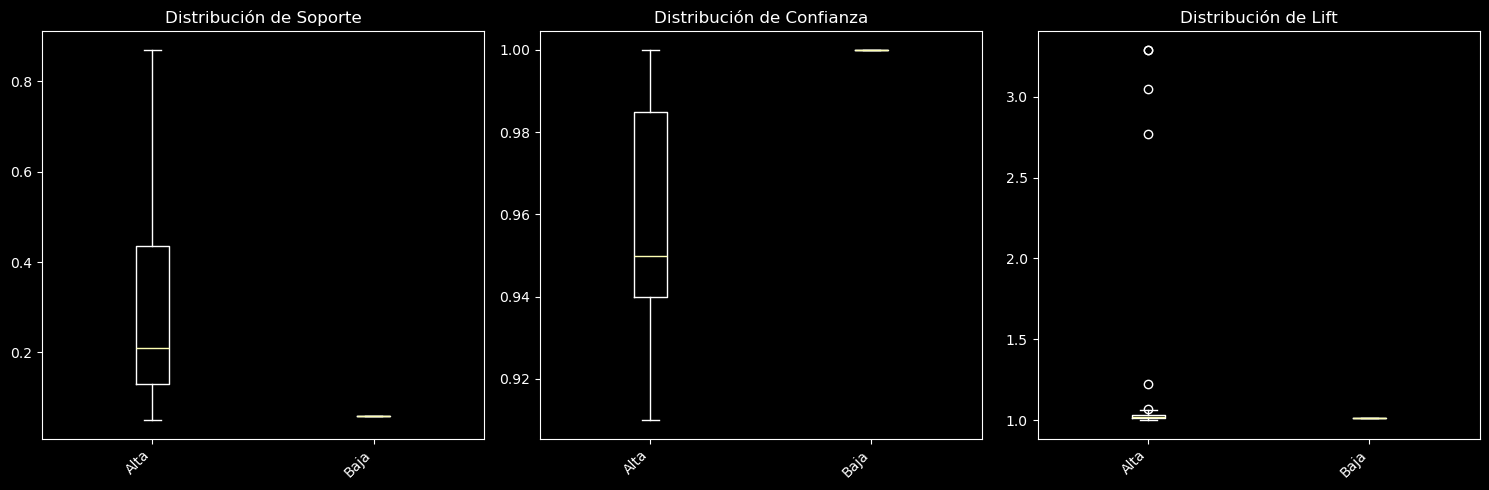

,Antecedentes,Consecuentes,Soporte,Confianza,Lift
26,"MES_11', 'Calidad_servicio_agua_Alta",Estacion_Primavera,0.09,1.00,3.29
25,"Calidad_servicio_agua_Alta', 'MES_10",Estacion_Primavera,0.06,1.00,3.29
54,"macroregion_inei_SUR', 'Calidad_servicio_agua_...",TEMP_GROUP_Bajo,0.13,1.00,3.05
23,"Estacion_Otoño', 'Calidad_servicio_agua_Alta",TEMP_GROUP_Bajo,0.19,0.91,2.77
52,"TEMP_GROUP_Alto', 'Calidad_servicio_agua_Alta",macroregion_inei_LIMA METROPOLITANA,0.32,0.94,1.22
32,"Calidad_servicio_agua_Alta', 'MES_10",Motivo_no_atencion_Sin razón específica,0.06,1.00,1.07
20,"Estacion_Invierno', 'Calidad_servicio_agua_Alta",Motivo_no_atencion_Sin razón específica,0.21,0.98,1.06
39,"MES_7', 'Calidad_servicio_agua_Alta",Motivo_no_atencion_Sin razón específica,0.16,0.99,1.06
27,"Estacion_Primavera', 'Calidad_servicio_agua_Alta",Motivo_no_atencion_Sin razón específica,0.27,0.98,1.05
21,"Estacion_Invierno', 'Calidad_servicio_agua_Alta",¿Ha tomado medicamentos por prevención o como ...,0.21,0.98,1.05


In [15]:
# Antecedentes: Calidad de agua
target_antecedents = [
'Calidad_servicio_agua_Alta', 'Calidad_servicio_agua_Baja',
       'Calidad_servicio_agua_Media'
]

# Generar y analizar las reglas
rules_df = main_targeted(
    df,
    target_antecedents,
    min_support=0.05,
    min_confidence=0.9,
    min_lift=1,
)
rules_df

=== Análisis de Reglas de Asociación con Antecedentes Específicos ===

Antecedentes objetivo: macroregion_inei_CENTRO, macroregion_inei_SUR
Número total de reglas encontradas: 3

Reglas con antecedente 'macroregion_inei_CENTRO':
Cantidad de reglas: 0

Reglas con antecedente 'macroregion_inei_SUR':
Cantidad de reglas: 3

Estadísticas de las métricas para estas reglas:

Soporte:
Mínimo: 0.1700
Máximo: 0.1700
Promedio: 0.1700

Confianza:
Mínimo: 1.0000
Máximo: 1.0000
Promedio: 1.0000

Lift:
Mínimo: 1.0100
Máximo: 3.1000
Promedio: 2.3867

Ejemplos de reglas encontradas:
Antecedentes: macroregion_inei_SUR
Consecuentes: ¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?_0 & TEMP_GROUP_Bajo
Lift: 3.1000

Antecedentes: macroregion_inei_SUR
Consecuentes: TEMP_GROUP_Bajo
Lift: 3.0500

Antecedentes: macroregion_inei_SUR
Consecuentes: ¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?_0
Lift: 1.0100



C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)
C:\Users\Jhoan\AppData\Local\Temp\ipykernel_3948\3715661131.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data, labels=labels)


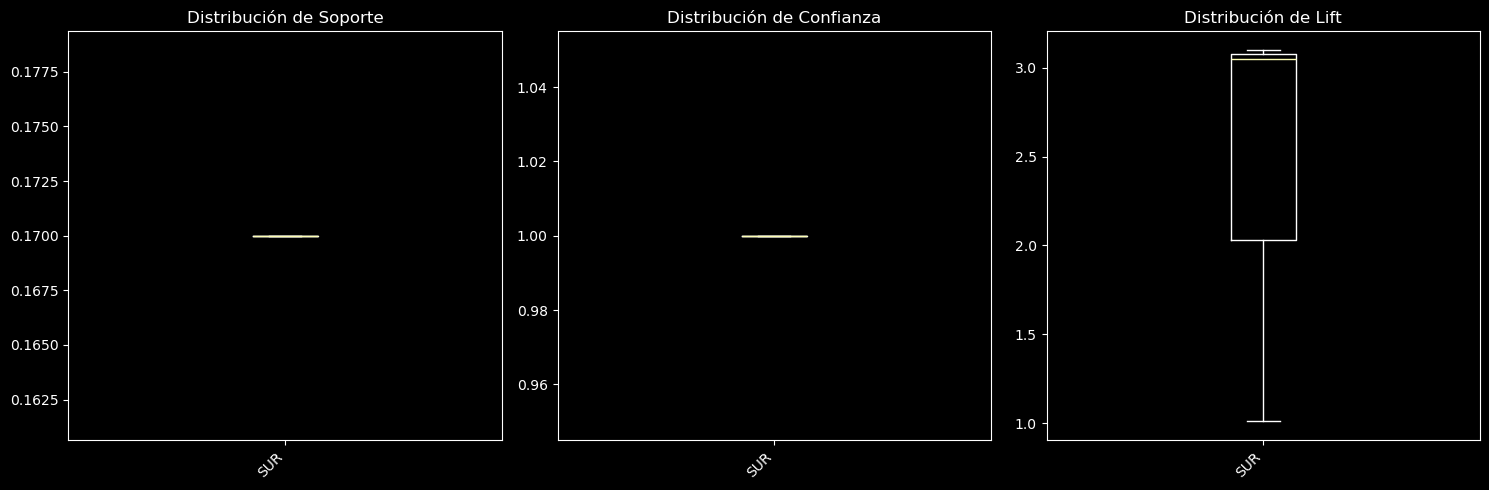

,Antecedentes,Consecuentes,Soporte,Confianza,Lift
2,macroregion_inei_SUR,¿Los medicamentos que usted ha tomado fueron :...,0.17,1.0,3.10
0,macroregion_inei_SUR,TEMP_GROUP_Bajo,0.17,1.0,3.05
1,macroregion_inei_SUR,¿Los medicamentos que usted ha tomado fueron :...,0.17,1.0,1.01


In [16]:
# Antecedentes: Macroregiones, excluyendo LIMA
target_antecedents = [
'macroregion_inei_CENTRO', 
       'macroregion_inei_SUR'
]

# Generar y analizar las reglas
rules_df = main_targeted(
    df,
    target_antecedents,
    min_support=0.16,
    min_confidence=0.6,
    min_lift=1,
)
rules_df